## Un problema de Erdös

**Problema**. Demuestre que todo entero mayor que $ 1$ puede ser representado como la suma de términos de la forma $ 2^p \cdot 3^q$ mayor que $ 1$, tales que ningún término en la suma es un divisor de otro término.

La solución de este problema se puede encontrar en esta [publicación](https://luisgrivas.github.io/blog/problem-solving/2020/11/05/PB-Komal-May19.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def factor3(n):
    if n % 3 == 0:
        return 1 + factor3(n / 3)
    else:
        return 0
    
def factor2(n):
    if n % 2 == 0:
        return 1 + factor2(n / 2 )
    else:
        return 0
    
def maxfactor3(n):
    if n - 3 >= 0:
        return 1 + maxfactor3( n // 3)
    else:
        return 0 
    
def subroutine(n):
    p3 = maxfactor3(n)
    p2 = factor2(n - 3**p3)
    m = (n - 3**p3) / 2**p2
    if m == 1:
        return f"3^{p3} + 2^{p2}"
    else:
        return f"3^{p3} + 2^{p2}({subroutine(m)})"

def erdos_decomposition(n):
    p2 = factor2(n)
    p3 = factor3(n)
    
    m = n / (2**p2 * 3**p3)
    
    if m == 1:
        return f"(2^{p2} * 3^{p3})"
    else:
        return f"(2^{p2} * 3^{p3}) * ({subroutine(m)})"
    
def n_dec(n):
    p3 = maxfactor3(n)
    p2 = factor2(n - 3**p3)
    m = (n - 3**p3) / 2**p2
    if m == 1:
        return 2
    else:
        return 1 + n_dec(m)


def n_erdos_decomposition(n):
    p2 = factor2(n)
    p3 = factor3(n)
    
    m = n / (2**p2 * 3**p3)
    
    if m == 1:
        return 1
    else:
        return n_dec(m)

Los siguientes ejemplos muestran el funcionamiento del algoritmo para obtener la descomposición según el requerimiento del problema. 

In [3]:
print(erdos_decomposition(5))
print("\nNúmero de términos: ", str(n_erdos_decomposition(5)))

(2^0 * 3^0) * (3^1 + 2^1)

Número de términos:  2


In [4]:
print(erdos_decomposition(31))
print("\nNúmero de términos: ", str(n_erdos_decomposition(31)))

(2^0 * 3^0) * (3^3 + 2^2)

Número de términos:  2


In [5]:
print(erdos_decomposition(57))
print("\nNúmero de términos: ", str(n_erdos_decomposition(57)))

(2^0 * 3^1) * (3^2 + 2^1(3^1 + 2^1))

Número de términos:  3


In [6]:
print(erdos_decomposition(101))
print("\nNúmero de términos: ", str(n_erdos_decomposition(101)))

(2^0 * 3^0) * (3^4 + 2^2(3^1 + 2^1))

Número de términos:  3


In [7]:
print(erdos_decomposition(235))
print("\nNúmero de términos: ", str(n_erdos_decomposition(235)))

(2^0 * 3^0) * (3^4 + 2^1(3^3 + 2^1(3^2 + 2^4)))

Número de términos:  4


### Probabilidad
Una pregunta natural es, ¿como se distribuyen el número de términos en la descomposición? Al parecer esta variable se distribuye normalmente. Apesar que no he demostrado lo anterior, los siguientes experimentos parece soportan esta conjetura.

In [8]:
for exp in [3, 4, 5, 6, 7]:
    x = list(range(2, 10**exp))
    counts = []
    
    for i in range(2, 10**exp):
        counts.append(n_erdos_decomposition(i))
    
    print("x < 10^"+str(exp))
    print("Mínimo: ", str(np.min(counts)))
    print("Media: ", str(np.mean(counts)))
    print("Desviación estándar: ", str(np.std(counts)))
    print("Mediana: ", str(np.median(counts)))
    print("Máximo: ", str(np.max(counts)))
    print("-"*20+"\n")


x < 10^3
Mínimo:  1
Media:  2.99498997995992
Desviación estándar:  0.9025542411491024
Mediana:  3.0
Máximo:  6
--------------------

x < 10^4
Mínimo:  1
Media:  3.9203840768153633
Desviación estándar:  1.0514198349129396
Mediana:  4.0
Máximo:  8
--------------------

x < 10^5
Mínimo:  1
Media:  4.854917098341967
Desviación estándar:  1.1842379072702718
Mediana:  5.0
Máximo:  10
--------------------

x < 10^6
Mínimo:  1
Media:  5.787935575871152
Desviación estándar:  1.2947424928061118
Mediana:  6.0
Máximo:  12
--------------------

x < 10^7
Mínimo:  1
Media:  6.718378143675629
Desviación estándar:  1.4080628332680247
Mediana:  7.0
Máximo:  14
--------------------



In [9]:
x = list(range(2, 1000000))
counts = list()

for i in range(2, 1000000):
    counts.append(n_erdos_decomposition(i))

M = max(counts)

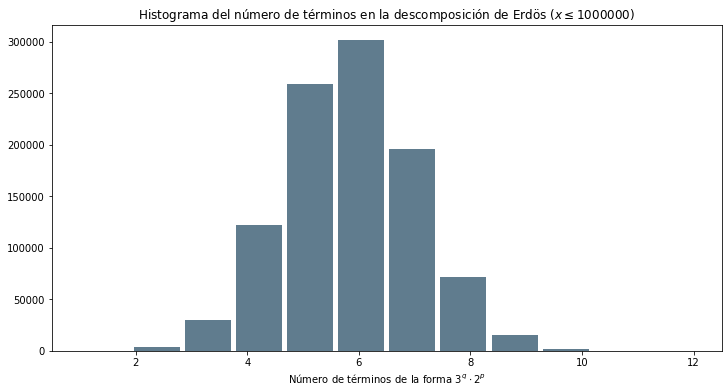

In [10]:
plt.figure(figsize=(12,6))
plt.hist(counts, bins=M, color='#607c8e', rwidth=0.9)
plt.title("Histograma del número de términos en la descomposición de Erdös $(x \leq 1000000)$")
plt.xlabel('Número de términos de la forma $3^q \cdot 2^p$')
plt.ylabel('')
plt.savefig("../plots/histerdos1.png", dpi=150)